### **Import the necessary libraries**

In [652]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

## Travel Datasets & Treatment of missing values

In [653]:
df1 = pd.read_csv("Traveldata_train.csv")
df1['dataset_type'] = 'train'

In [654]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   dataset_type             94379 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 7.2+ MB


In [655]:
df2 = pd.read_csv('Traveldata_test.csv')
df2['dataset_type'] = 'test'

In [656]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35572 non-null  object 
 2   Customer_Type            32219 non-null  object 
 3   Age                      35591 non-null  float64
 4   Type_Travel              32154 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  int64  
 7   Departure_Delay_in_Mins  35573 non-null  float64
 8   Arrival_Delay_in_Mins    35479 non-null  float64
 9   dataset_type             35602 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 2.7+ MB


## Union the two tables

In [657]:
df_travel = pd.concat([df1, df2])

In [658]:
df_travel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129981 entries, 0 to 35601
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       129981 non-null  int64  
 1   Gender                   129874 non-null  object 
 2   Customer_Type            117647 non-null  object 
 3   Age                      129937 non-null  float64
 4   Type_Travel              117307 non-null  object 
 5   Travel_Class             129981 non-null  object 
 6   Travel_Distance          129981 non-null  int64  
 7   Departure_Delay_in_Mins  129895 non-null  float64
 8   Arrival_Delay_in_Mins    129501 non-null  float64
 9   dataset_type             129981 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 10.9+ MB


In [659]:
travel = df_travel.copy()

In [660]:
travel.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,dataset_type
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,train
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,train
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,train
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,train
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,train


In [661]:
travel.tail()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,dataset_type
35597,99935598,Male,Loyal Customer,8.0,Personal Travel,Eco,1334,0.0,0.0,test
35598,99935599,Female,Loyal Customer,53.0,Business Travel,Business,1772,0.0,0.0,test
35599,99935600,Male,Disloyal Customer,22.0,Business Travel,Eco,1180,0.0,0.0,test
35600,99935601,Female,Loyal Customer,67.0,Personal Travel,Eco,420,23.0,16.0,test
35601,99935602,Male,NaN,20.0,Personal Travel,Eco,1680,0.0,0.0,test


### **Checking for missing values**

In [662]:
missing_values_travel = travel.isnull().sum()
missing_values_travel.sort_values(ascending=False)

Type_Travel                12674
Customer_Type              12334
Arrival_Delay_in_Mins        480
Gender                       107
Departure_Delay_in_Mins       86
Age                           44
ID                             0
Travel_Class                   0
Travel_Distance                0
dataset_type                   0
dtype: int64

In [663]:
share_missing_values_travel = missing_values_travel/travel.isnull().count()
share_missing_values_travel.sort_values(ascending=False)

Type_Travel                0.097507
Customer_Type              0.094891
Arrival_Delay_in_Mins      0.003693
Gender                     0.000823
Departure_Delay_in_Mins    0.000662
Age                        0.000339
ID                         0.000000
Travel_Class               0.000000
Travel_Distance            0.000000
dataset_type               0.000000
dtype: float64

## Treating missing values of travel data

In [664]:
def clean_travel(df):
    # Separating categories and numerics 
    cat_list = df.select_dtypes(['object']).columns.tolist()
    num_list = df.select_dtypes(['number']).columns.tolist()

    # Replacing NaN values in the data
    #10% of values for cust type and travel type are unknown - this could be significant
    #df.loc[df['Customer_Type'].isnull(),'Customer_Type'] =  df['Customer_Type'].mode()[0]
    df.loc[df['Customer_Type'].isnull(),'Customer_Type'] =  "Unknown"
    #df.loc[df['Type_Travel'].isnull(),'Type_Travel'] =  df['Type_Travel'].mode()[0]
    df.loc[df['Type_Travel'].isnull(),'Type_Travel'] =  "Unknown"
    # added this 
    df.loc[df['Gender'].isnull(),'Gender'] =  "Unknown"

    df.loc[df['Age'].isnull(),'Age'] =  df['Age'].mean()
    
    df.loc[df['Departure_Delay_in_Mins'].isnull(),'Departure_Delay_in_Mins'] = df['Departure_Delay_in_Mins'].median() 
    df.loc[df['Arrival_Delay_in_Mins'].isnull(),'Arrival_Delay_in_Mins'] = df['Arrival_Delay_in_Mins'].median() 

    df.loc[df['Gender'].isnull(),'Gender'] = df['Gender'].mode() 
    #dropping Gender Na would lose too much info however less than 0.1% of samples are unknown.  we will just use mode
    
    for col in cat_list:
        df[col] = df[col].astype('category')
    
    return df

In [665]:
cleaned_travel = clean_travel(travel)

In [666]:
cleaned_travel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129981 entries, 0 to 35601
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   ID                       129981 non-null  int64   
 1   Gender                   129981 non-null  category
 2   Customer_Type            129981 non-null  category
 3   Age                      129981 non-null  float64 
 4   Type_Travel              129981 non-null  category
 5   Travel_Class             129981 non-null  category
 6   Travel_Distance          129981 non-null  int64   
 7   Departure_Delay_in_Mins  129981 non-null  float64 
 8   Arrival_Delay_in_Mins    129981 non-null  float64 
 9   dataset_type             129981 non-null  category
dtypes: category(5), float64(3), int64(2)
memory usage: 6.6 MB


## Survey Datasets & Treatment of missing values

In [667]:
df3 =pd.read_csv("Surveydata_train.csv")
df3['dataset_type'] = 'train'

In [668]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

In [669]:
# it's not a 50/50 split balanced but it means that in general in our training data we have more customers who were satisfied (54%)
df3.groupby(['Overall_Experience'])['Overall_Experience'].count()

Overall_Experience
0    42786
1    51593
Name: Overall_Experience, dtype: int64

In [670]:
df4 = pd.read_csv('Surveydata_test.csv')
df4['dataset_type'] = 'test'

In [671]:
# Notice that in the survery data TEST set we don't have the column Overall_Experience. It's normal as our models will need to predict it. 
# However, we will need to exclude a treatment of missing vsalues for that column when we merge the two datasets.
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       35602 non-null  int64 
 1   Seat_Comfort             35580 non-null  object
 2   Seat_Class               35602 non-null  object
 3   Arrival_Time_Convenient  32277 non-null  object
 4   Catering                 32245 non-null  object
 5   Platform_Location        35590 non-null  object
 6   Onboard_Wifi_Service     35590 non-null  object
 7   Onboard_Entertainment    35594 non-null  object
 8   Online_Support           35576 non-null  object
 9   Ease_of_Online_Booking   35584 non-null  object
 10  Onboard_Service          32730 non-null  object
 11  Legroom                  35577 non-null  object
 12  Baggage_Handling         35562 non-null  object
 13  CheckIn_Service          35580 non-null  object
 14  Cleanliness              35600 non-nul

## Union the two tables

In [672]:
df_survey = pd.concat([df3, df4])

In [673]:
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129981 entries, 0 to 35601
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       129981 non-null  int64  
 1   Overall_Experience       94379 non-null   float64
 2   Seat_Comfort             129898 non-null  object 
 3   Seat_Class               129981 non-null  object 
 4   Arrival_Time_Convenient  117726 non-null  object 
 5   Catering                 117883 non-null  object 
 6   Platform_Location        129939 non-null  object 
 7   Onboard_Wifi_Service     129939 non-null  object 
 8   Onboard_Entertainment    129955 non-null  object 
 9   Online_Support           129864 non-null  object 
 10  Ease_of_Online_Booking   129890 non-null  object 
 11  Onboard_Service          119508 non-null  object 
 12  Legroom                  129866 non-null  object 
 13  Baggage_Handling         129799 non-null  object 
 14  Check

In [674]:
survey =df_survey.copy()

In [675]:
survey.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,dataset_type
0,98800001,0.0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor,train
1,98800002,0.0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good,train
2,98800003,1.0,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent,train
3,98800004,0.0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable,train
4,98800005,1.0,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good,train


In [676]:
survey.tail()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,dataset_type
35597,99935598,NaN,Needs Improvement,Green Car,Excellent,Needs Improvement,Manageable,Acceptable,Needs Improvement,Acceptable,Acceptable,Good,Excellent,Good,Acceptable,Good,Acceptable,test
35598,99935599,NaN,Needs Improvement,Ordinary,Needs Improvement,Good,Needs Improvement,Acceptable,Excellent,Excellent,Good,Good,Good,Good,Acceptable,Good,Good,test
35599,99935600,NaN,Good,Green Car,Extremely Poor,Good,Needs Improvement,Needs Improvement,Good,Poor,Needs Improvement,Poor,Acceptable,Poor,Poor,Excellent,Needs Improvement,test
35600,99935601,NaN,Excellent,Ordinary,Excellent,Excellent,Inconvenient,Acceptable,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Acceptable,Excellent,Good,test
35601,99935602,NaN,Good,Ordinary,Acceptable,Good,Manageable,Poor,Good,Poor,Poor,Acceptable,Good,Good,Needs Improvement,Good,Poor,test


## Checking for missing values

In [677]:
missing_values_survey = survey.isnull().sum()
missing_values_survey.sort_values(ascending=False)

Overall_Experience         35602
Arrival_Time_Convenient    12255
Catering                   12098
Onboard_Service            10473
Baggage_Handling             182
Online_Support               117
Legroom                      115
CheckIn_Service               99
Ease_of_Online_Booking        91
Seat_Comfort                  83
Platform_Location             42
Onboard_Wifi_Service          42
Onboard_Entertainment         26
Cleanliness                    8
Online_Boarding                8
ID                             0
Seat_Class                     0
dataset_type                   0
dtype: int64

In [678]:
share_missing_values_survey = missing_values_survey/survey.isnull().count()
share_missing_values_survey.sort_values(ascending=False)

Overall_Experience         0.273902
Arrival_Time_Convenient    0.094283
Catering                   0.093075
Onboard_Service            0.080573
Baggage_Handling           0.001400
Online_Support             0.000900
Legroom                    0.000885
CheckIn_Service            0.000762
Ease_of_Online_Booking     0.000700
Seat_Comfort               0.000639
Platform_Location          0.000323
Onboard_Wifi_Service       0.000323
Onboard_Entertainment      0.000200
Cleanliness                0.000062
Online_Boarding            0.000062
ID                         0.000000
Seat_Class                 0.000000
dataset_type               0.000000
dtype: float64

## Treating missing values of Survey Data

In [679]:
# to not treat the values for the test set, we don't have missing values in the train set
survey.drop('Overall_Experience',axis=1,inplace=True)

In [680]:
# I had to do it separately otherwise missing values remain but by doing it before hand it works
survey['Platform_Location'].fillna('no answer', inplace = True)

In [681]:
#this one cell cleans all the data for the survey train/test
def clean_survey(df):
    #create a list of ratings columns. Exclude ID and Overall experience
    #remove seat class - it is a classifier
    #reomve Platform location for separate treatment
    cols_rating = df.columns[2:]
    cols_rating = cols_rating.drop(['Seat_Class','Platform_Location'])
    #fill NA in both train and test
    for i in cols_rating:
        df[i].fillna('no answer', inplace = True)
    #***NOTE - I moved no answer to the middle value instead of the low value.  may want to test both.
    #***NOTE - What happens if we increase the weights on thses numbers doubled? squared? etc
    #set values to replace
    names = [
        'Excellent',
        'Good',
        'Acceptable',
        'no answer',
        'Needs Improvement',
        'Poor',
        'Extremely Poor'
    ]
    #set values to replace for Platform_Location
    names_plat = [
        'Very Convenient',
        'Convenient',
        'Manageable',
        'no answer',
        'Needs Improvement', 
        'Inconvenient',
        'Very Inconvenient',
    ]
    #numbers that will replace inputs
    numbers = [6,5,4,3,2,1,0]
    #replace the values in the dataframes
    for i in df[cols_rating]:
        df[i].replace(to_replace = names, value = numbers, inplace=True)
    #Also replace 'Platform_Location' column with numbers
    df['Platform_Location'].replace(to_replace = names_plat, value = numbers, inplace=True)
    #Set seat class as a category
    df['Seat_Class'].astype('category')
    
    return df

In [682]:
cleaned_survey = clean_survey(survey)

In [683]:
cleaned_survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129981 entries, 0 to 35601
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ID                       129981 non-null  int64 
 1   Seat_Comfort             129898 non-null  object
 2   Seat_Class               129981 non-null  object
 3   Arrival_Time_Convenient  129981 non-null  int64 
 4   Catering                 129981 non-null  int64 
 5   Platform_Location        129981 non-null  int64 
 6   Onboard_Wifi_Service     129981 non-null  int64 
 7   Onboard_Entertainment    129981 non-null  int64 
 8   Online_Support           129981 non-null  int64 
 9   Ease_of_Online_Booking   129981 non-null  int64 
 10  Onboard_Service          129981 non-null  int64 
 11  Legroom                  129981 non-null  int64 
 12  Baggage_Handling         129981 non-null  int64 
 13  CheckIn_Service          129981 non-null  int64 
 14  Cleanliness          

In [684]:
survey_train_set = cleaned_survey[cleaned_survey['dataset_type']=='train']

In [685]:
survey_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Seat_Comfort             94318 non-null  object
 2   Seat_Class               94379 non-null  object
 3   Arrival_Time_Convenient  94379 non-null  int64 
 4   Catering                 94379 non-null  int64 
 5   Platform_Location        94379 non-null  int64 
 6   Onboard_Wifi_Service     94379 non-null  int64 
 7   Onboard_Entertainment    94379 non-null  int64 
 8   Online_Support           94379 non-null  int64 
 9   Ease_of_Online_Booking   94379 non-null  int64 
 10  Onboard_Service          94379 non-null  int64 
 11  Legroom                  94379 non-null  int64 
 12  Baggage_Handling         94379 non-null  int64 
 13  CheckIn_Service          94379 non-null  int64 
 14  Cleanliness              94379 non-nul

In [686]:
df3_overall_experience = df3[['ID','Overall_Experience']]

In [687]:
survey_train_set = survey_train_set.merge(df3_overall_experience,on='ID',how='inner')

In [688]:
survey_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Seat_Comfort             94318 non-null  object
 2   Seat_Class               94379 non-null  object
 3   Arrival_Time_Convenient  94379 non-null  int64 
 4   Catering                 94379 non-null  int64 
 5   Platform_Location        94379 non-null  int64 
 6   Onboard_Wifi_Service     94379 non-null  int64 
 7   Onboard_Entertainment    94379 non-null  int64 
 8   Online_Support           94379 non-null  int64 
 9   Ease_of_Online_Booking   94379 non-null  int64 
 10  Onboard_Service          94379 non-null  int64 
 11  Legroom                  94379 non-null  int64 
 12  Baggage_Handling         94379 non-null  int64 
 13  CheckIn_Service          94379 non-null  int64 
 14  Cleanliness              94379 non-nul

In [689]:
survey_train_set.head().T

,0,1,2,3,4
ID,98800001,98800002,98800003,98800004,98800005
Seat_Comfort,Needs Improvement,Poor,Needs Improvement,Acceptable,Acceptable
Seat_Class,Green Car,Ordinary,Green Car,Ordinary,Ordinary
Arrival_Time_Convenient,6,6,2,2,4
Catering,6,1,2,3,4
Platform_Location,6,2,2,2,4
Onboard_Wifi_Service,5,5,2,4,2
Onboard_Entertainment,2,1,5,2,5
Online_Support,4,5,6,4,6
Ease_of_Online_Booking,2,5,6,4,5


In [690]:
survey_test_set = survey[survey['dataset_type']=='test']

In [691]:
cleaned_survey = pd.concat([survey_train_set, survey_test_set])

In [692]:
cleaned_survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129981 entries, 0 to 35601
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       129981 non-null  int64  
 1   Seat_Comfort             129898 non-null  object 
 2   Seat_Class               129981 non-null  object 
 3   Arrival_Time_Convenient  129981 non-null  int64  
 4   Catering                 129981 non-null  int64  
 5   Platform_Location        129981 non-null  int64  
 6   Onboard_Wifi_Service     129981 non-null  int64  
 7   Onboard_Entertainment    129981 non-null  int64  
 8   Online_Support           129981 non-null  int64  
 9   Ease_of_Online_Booking   129981 non-null  int64  
 10  Onboard_Service          129981 non-null  int64  
 11  Legroom                  129981 non-null  int64  
 12  Baggage_Handling         129981 non-null  int64  
 13  CheckIn_Service          129981 non-null  int64  
 14  Clean

In [693]:
cleaned_survey.head().T

,0,1,2,3,4
ID,98800001,98800002,98800003,98800004,98800005
Seat_Comfort,Needs Improvement,Poor,Needs Improvement,Acceptable,Acceptable
Seat_Class,Green Car,Ordinary,Green Car,Ordinary,Ordinary
Arrival_Time_Convenient,6,6,2,2,4
Catering,6,1,2,3,4
Platform_Location,6,2,2,2,4
Onboard_Wifi_Service,5,5,2,4,2
Onboard_Entertainment,2,1,5,2,5
Online_Support,4,5,6,4,6
Ease_of_Online_Booking,2,5,6,4,5


# Joining Travel + Survey treated DFs

In [694]:
df = cleaned_travel.merge(cleaned_survey,on='ID',how='inner')

In [695]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129981 entries, 0 to 129980
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   ID                       129981 non-null  int64   
 1   Gender                   129981 non-null  category
 2   Customer_Type            129981 non-null  category
 3   Age                      129981 non-null  float64 
 4   Type_Travel              129981 non-null  category
 5   Travel_Class             129981 non-null  category
 6   Travel_Distance          129981 non-null  int64   
 7   Departure_Delay_in_Mins  129981 non-null  float64 
 8   Arrival_Delay_in_Mins    129981 non-null  float64 
 9   dataset_type_x           129981 non-null  category
 10  Seat_Comfort             129898 non-null  object  
 11  Seat_Class               129981 non-null  object  
 12  Arrival_Time_Convenient  129981 non-null  int64   
 13  Catering                 129981 non-null  in

In [696]:
cols = df.select_dtypes(['object']).columns.tolist()
cols.append('Overall_Experience')
for i in cols:
    df[i] = df[i].astype('category')

In [697]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129981 entries, 0 to 129980
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   ID                       129981 non-null  int64   
 1   Gender                   129981 non-null  category
 2   Customer_Type            129981 non-null  category
 3   Age                      129981 non-null  float64 
 4   Type_Travel              129981 non-null  category
 5   Travel_Class             129981 non-null  category
 6   Travel_Distance          129981 non-null  int64   
 7   Departure_Delay_in_Mins  129981 non-null  float64 
 8   Arrival_Delay_in_Mins    129981 non-null  float64 
 9   dataset_type_x           129981 non-null  category
 10  Seat_Comfort             129898 non-null  category
 11  Seat_Class               129981 non-null  category
 12  Arrival_Time_Convenient  129981 non-null  int64   
 13  Catering                 129981 non-null  in

In [698]:
df.head().T

,0,1,2,3,4
ID,98800001,98800002,98800003,98800004,98800005
Gender,Female,Male,Female,Female,Female
Customer_Type,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
Age,52.0,48.0,43.0,44.0,50.0
Type_Travel,Unknown,Personal Travel,Business Travel,Business Travel,Business Travel
Travel_Class,Business,Eco,Business,Business,Business
Travel_Distance,272,2200,1061,780,1981
Departure_Delay_in_Mins,0.0,9.0,77.0,13.0,0.0
Arrival_Delay_in_Mins,5.0,0.0,119.0,18.0,0.0
dataset_type_x,train,train,train,train,train


In [699]:
df.tail().T

,129976,129977,129978,129979,129980
ID,99935598,99935599,99935600,99935601,99935602
Gender,Male,Female,Male,Female,Male
Customer_Type,Loyal Customer,Loyal Customer,Disloyal Customer,Loyal Customer,Unknown
Age,8.0,53.0,22.0,67.0,20.0
Type_Travel,Personal Travel,Business Travel,Business Travel,Personal Travel,Personal Travel
Travel_Class,Eco,Business,Eco,Eco,Eco
Travel_Distance,1334,1772,1180,420,1680
Departure_Delay_in_Mins,0.0,0.0,0.0,23.0,0.0
Arrival_Delay_in_Mins,0.0,0.0,0.0,16.0,0.0
dataset_type_x,test,test,test,test,test


# Descriptive Analysis

### **Analyzing Summary Statistics of the dataset**

In [709]:
df.drop(columns=['ID','dataset_type_x','dataset_type_y'],axis=1,inplace=True)

In [710]:
# Analyzing the summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129981.0,39.427138,15.119752,7.0,27.0,40.0,51.0,85.0
Travel_Distance,129981.0,1981.151591,1026.964654,50.0,1359.0,1924.0,2543.0,6951.0
Departure_Delay_in_Mins,129981.0,14.701333,38.061578,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,129981.0,15.032674,38.404512,0.0,0.0,0.0,13.0,1584.0
Arrival_Time_Convenient,129981.0,3.549234,1.877078,0.0,2.0,4.0,5.0,6.0
Catering,129981.0,3.395281,1.797290,0.0,2.0,4.0,5.0,6.0
Platform_Location,129981.0,3.627676,1.732851,0.0,2.0,4.0,5.0,6.0
Onboard_Wifi_Service,129981.0,3.926351,1.730175,0.0,2.0,4.0,5.0,6.0
Onboard_Entertainment,129981.0,4.121633,1.732408,0.0,2.0,5.0,5.0,6.0
Online_Support,129981.0,4.278287,1.683221,0.0,4.0,5.0,6.0,6.0


In [711]:
df.describe(include=['category']).T

,count,unique,top,freq
Gender,129981,3,Female,65884
Customer_Type,129981,3,Loyal Customer,96172
Type_Travel,129981,3,Business Travel,80930
Travel_Class,129981,2,Eco,67815
Seat_Comfort,129898,6,Acceptable,29161
Seat_Class,129981,2,Green Car,65177
Overall_Experience,94379.0,2.0,1.0,51593.0


In [712]:
# Checking the count of unique values in each categorical column 
cols_cat= df.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i])
    print('Nbr of missing values',cols_cat[i].isnull().sum())    
    print(cols_cat[i].value_counts())    
    print('*'*40)

Unique values in Gender are :
0         Female
1           Male
2         Female
3         Female
4         Female
           ...  
129976      Male
129977    Female
129978      Male
129979    Female
129980      Male
Name: Gender, Length: 129981, dtype: category
Categories (3, object): ['Female', 'Male', 'Unknown']
Nbr of missing values 0
Female     65884
Male       63990
Unknown      107
Name: Gender, dtype: int64
****************************************
Unique values in Customer_Type are :
0            Loyal Customer
1            Loyal Customer
2            Loyal Customer
3            Loyal Customer
4            Loyal Customer
                ...        
129976       Loyal Customer
129977       Loyal Customer
129978    Disloyal Customer
129979       Loyal Customer
129980              Unknown
Name: Customer_Type, Length: 129981, dtype: category
Categories (3, object): ['Disloyal Customer', 'Loyal Customer', 'Unknown']
Nbr of missing values 0
Loyal Customer       96172
Disloyal Custome

In [713]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots                                        
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize,                                        
                                           ) # creating the 2 subplots
    print(col)
    print('Skew :', round(cols_not_cat[col].skew(), 2))
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram
    plt.show()

In [714]:
cols_not_cat = df.select_dtypes(exclude=['category'])

In [715]:
cols_not_cat.columns

Index(['Age', 'Travel_Distance', 'Departure_Delay_in_Mins',
       'Arrival_Delay_in_Mins', 'Arrival_Time_Convenient', 'Catering',
       'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment',
       'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service',
       'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding'],
      dtype='object')

Age
Skew : -0.0


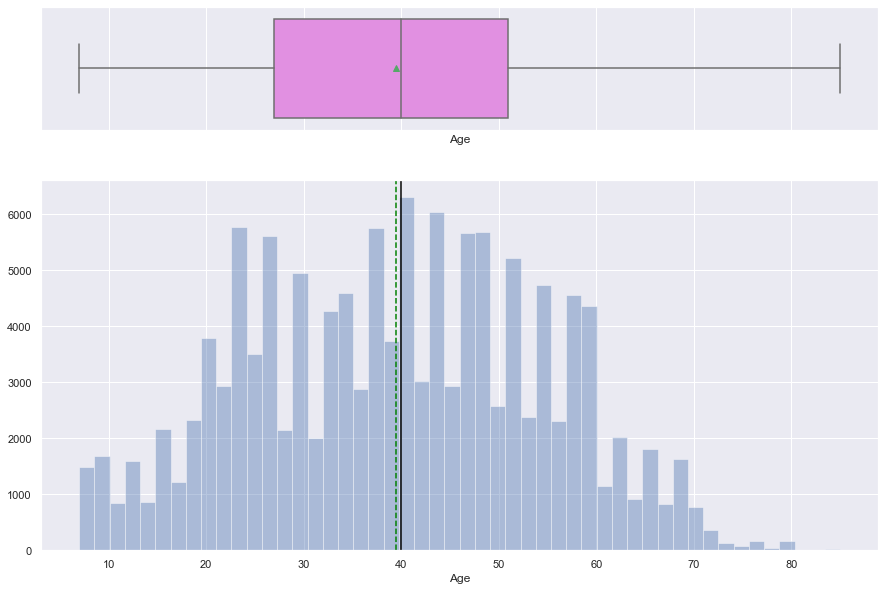

Travel_Distance
Skew : 0.47


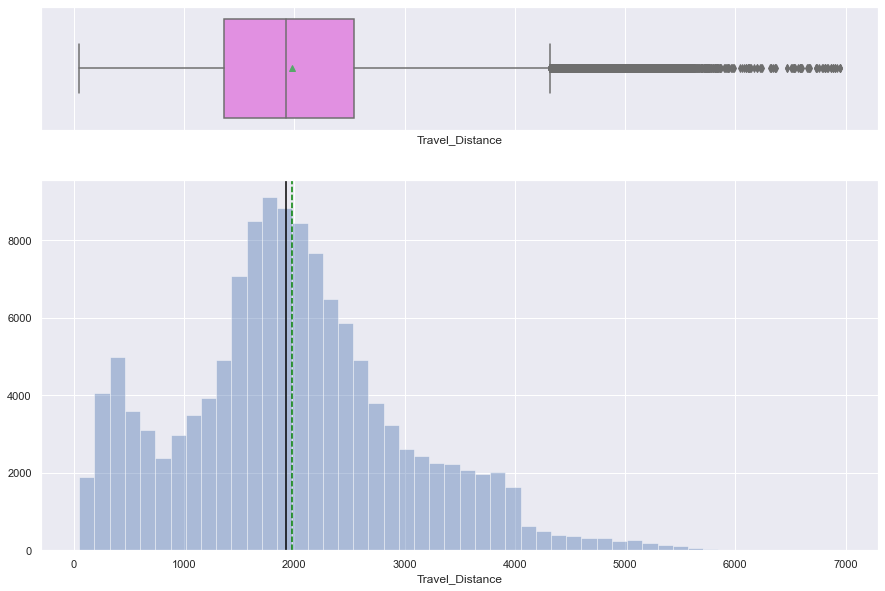

Departure_Delay_in_Mins
Skew : 6.82


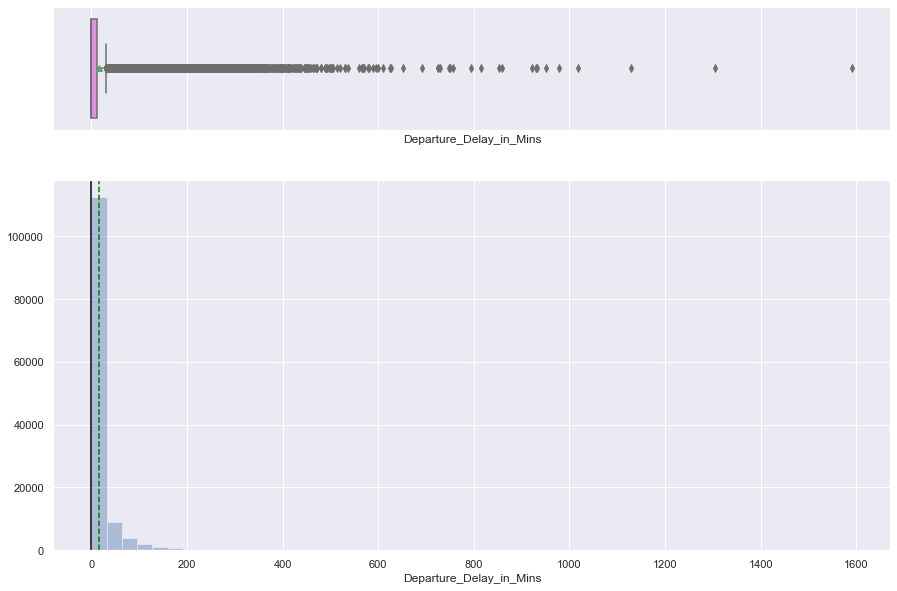

Arrival_Delay_in_Mins
Skew : 6.68


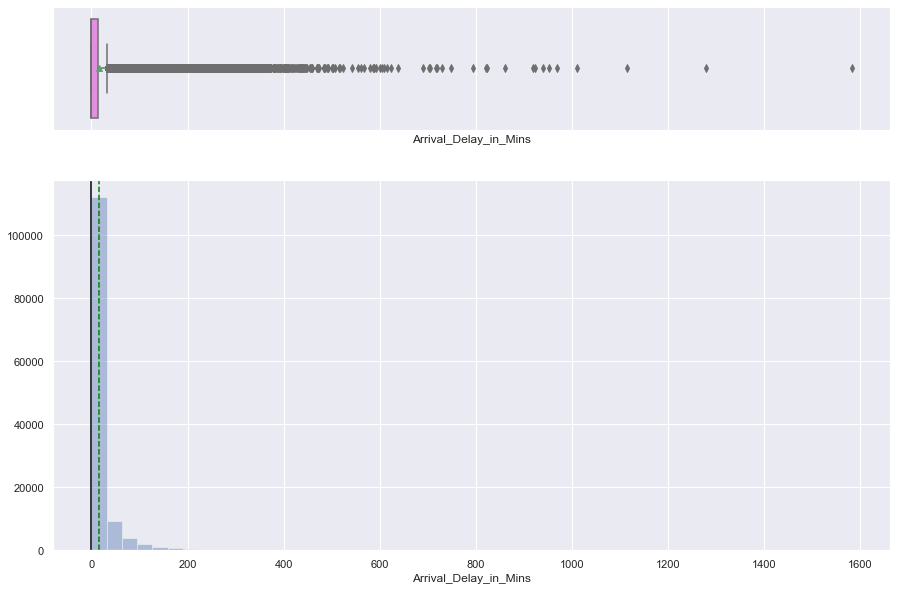

Arrival_Time_Convenient
Skew : -0.25


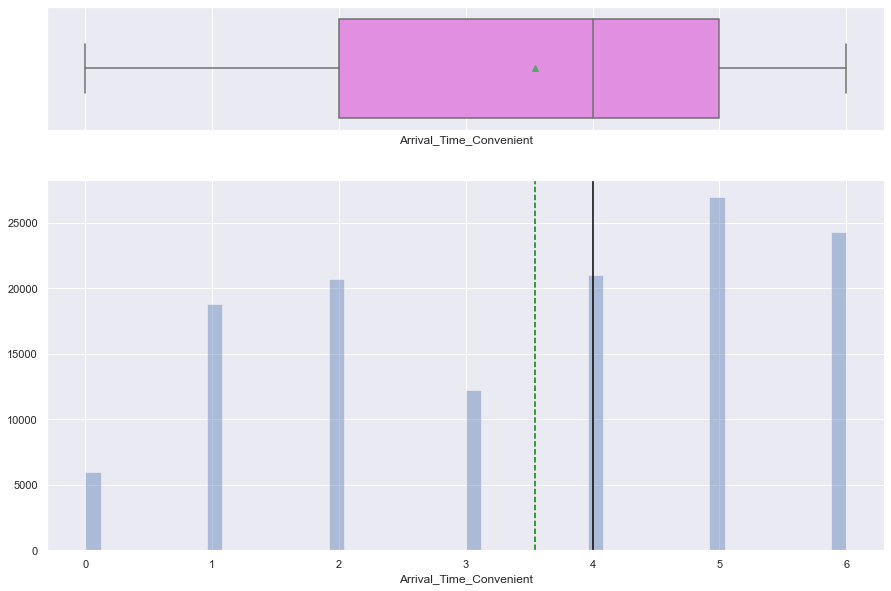

Catering
Skew : -0.14


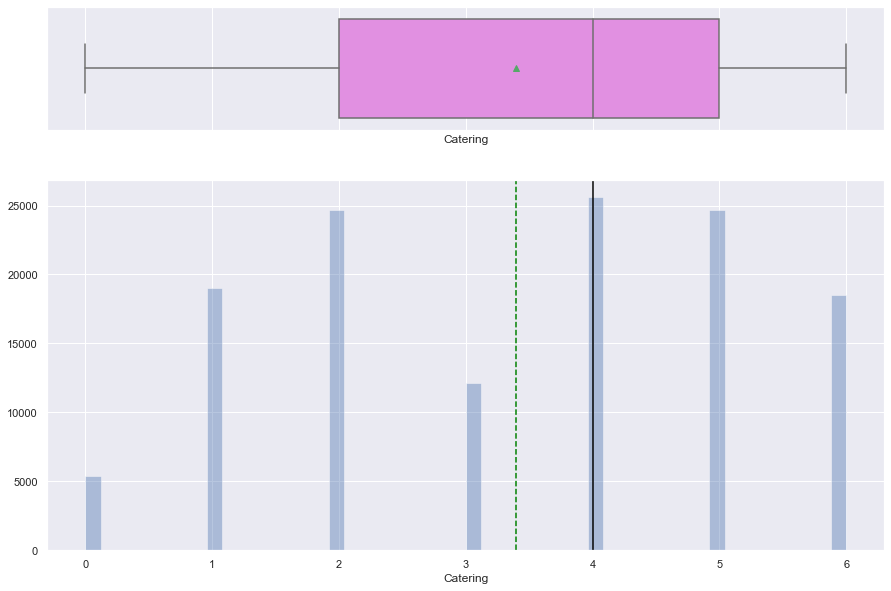

Platform_Location
Skew : -0.27


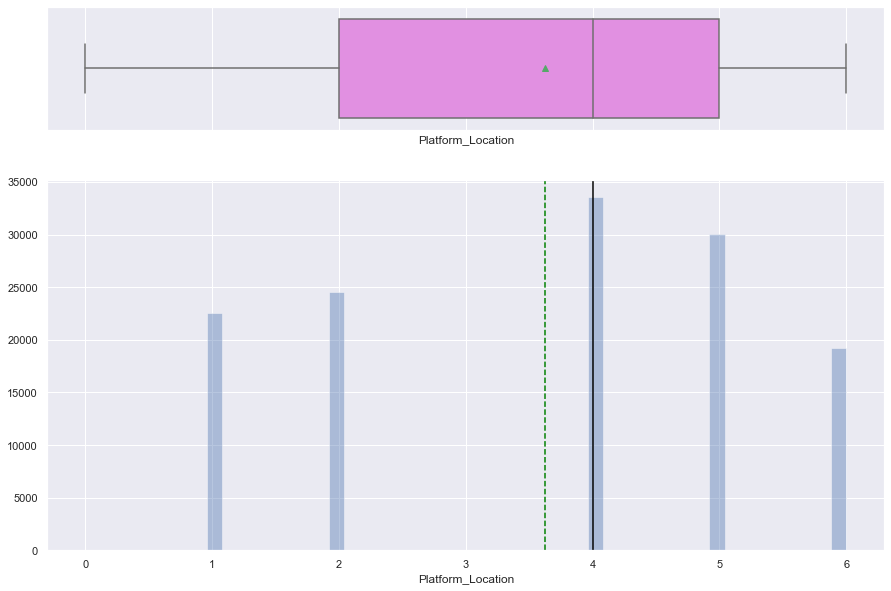

Onboard_Wifi_Service
Skew : -0.41


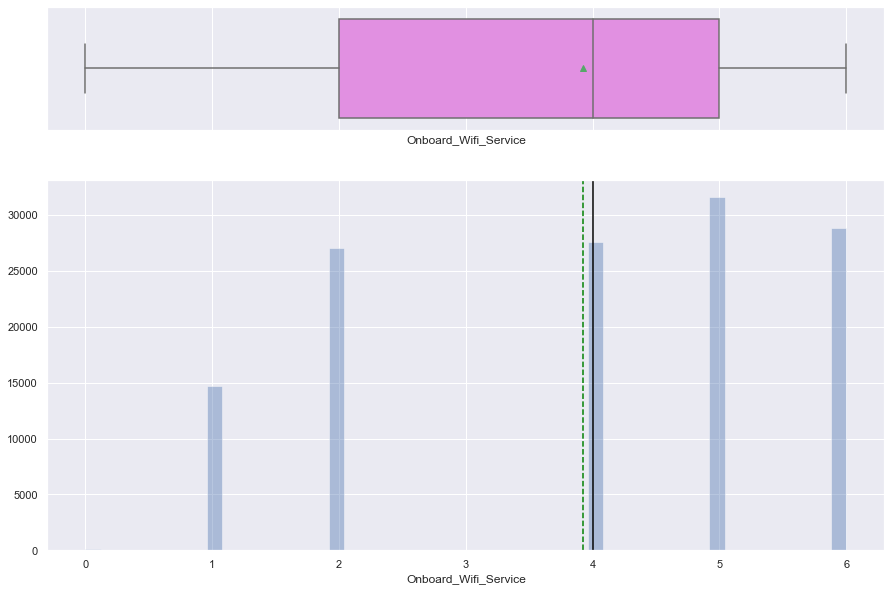

Onboard_Entertainment
Skew : -0.78


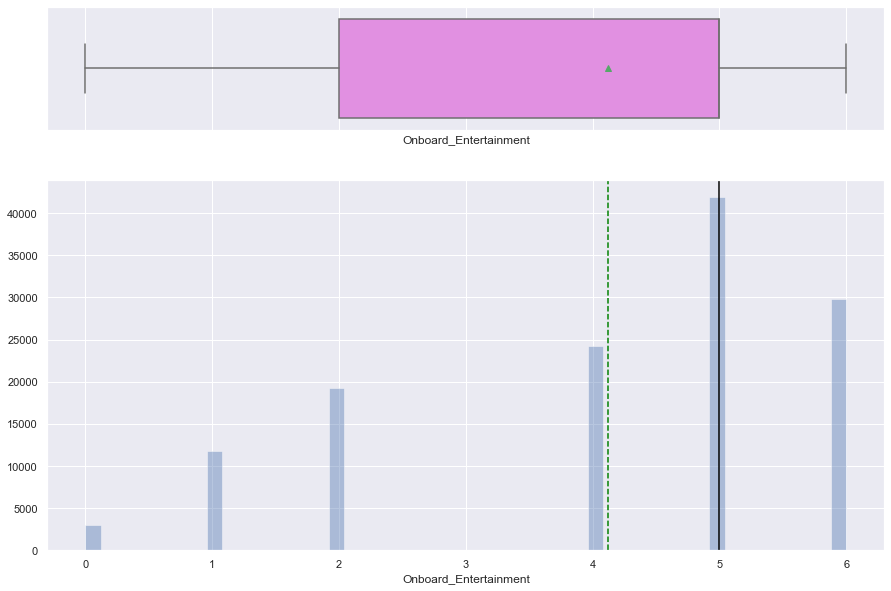

Online_Support
Skew : -0.8


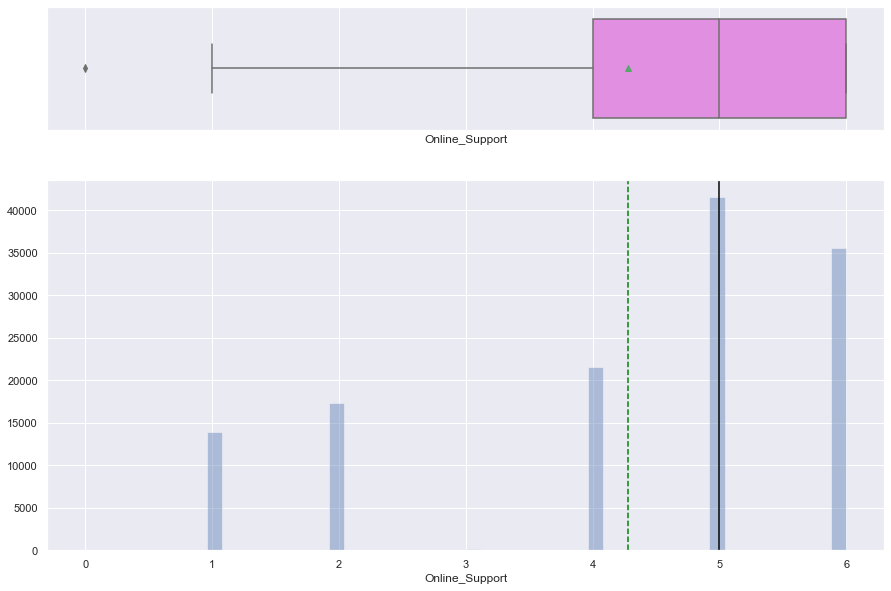

Ease_of_Online_Booking
Skew : -0.72


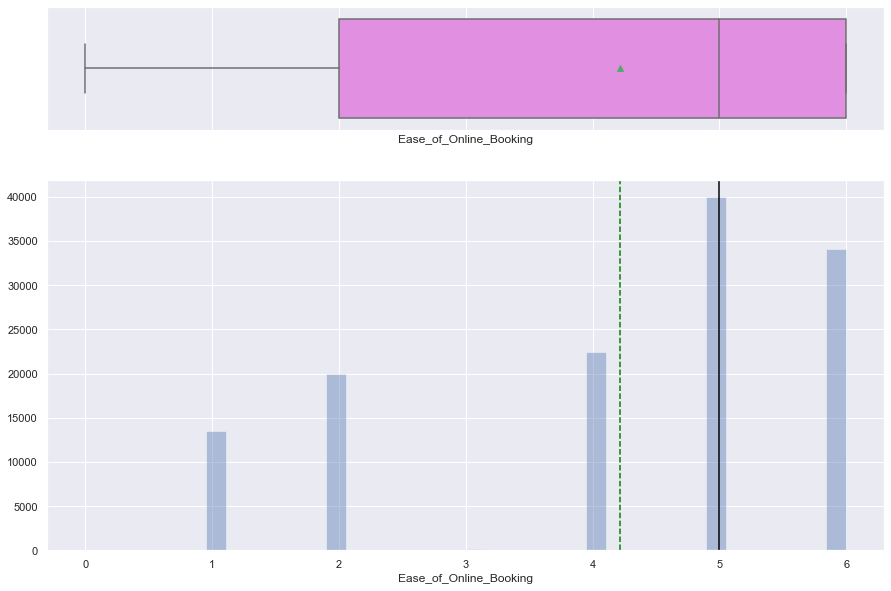

Onboard_Service
Skew : -0.61


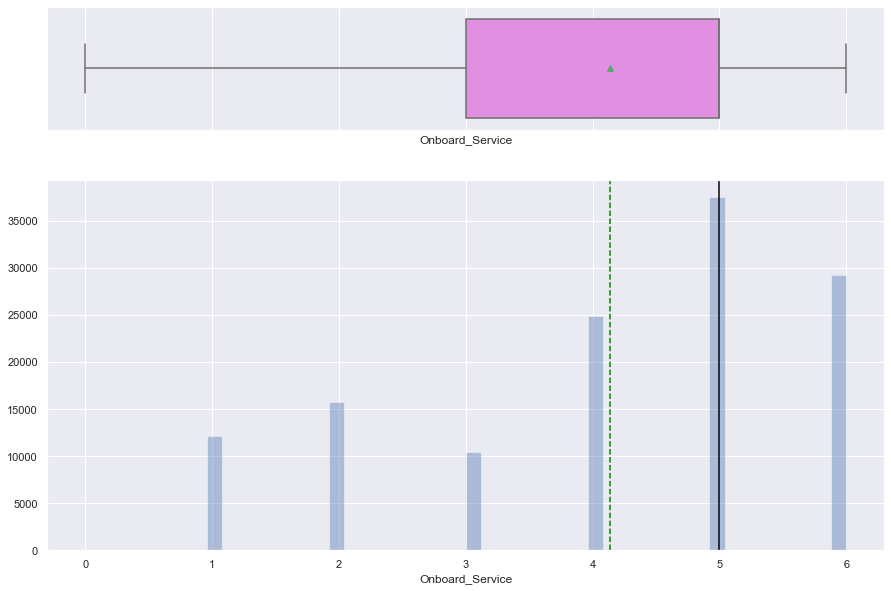

Legroom
Skew : -0.72


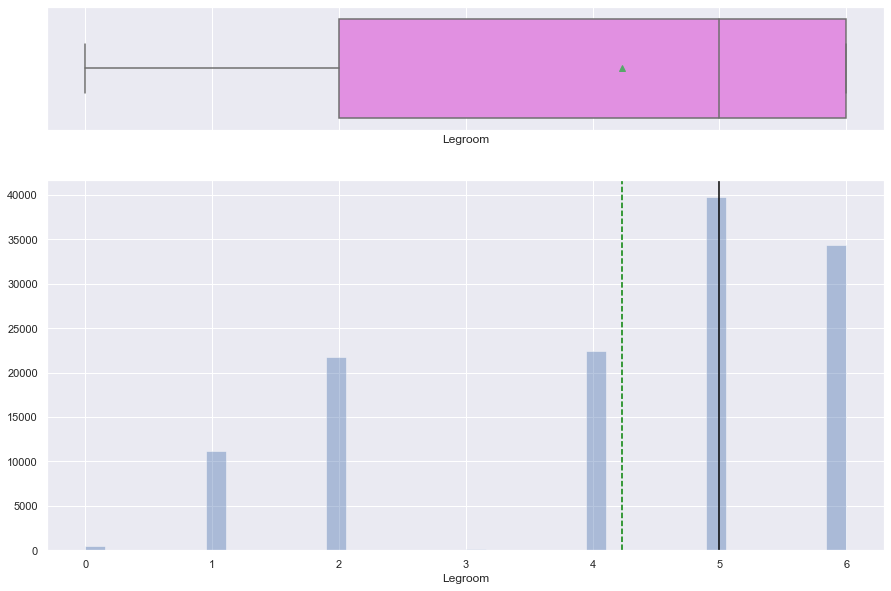

Baggage_Handling
Skew : -1.1


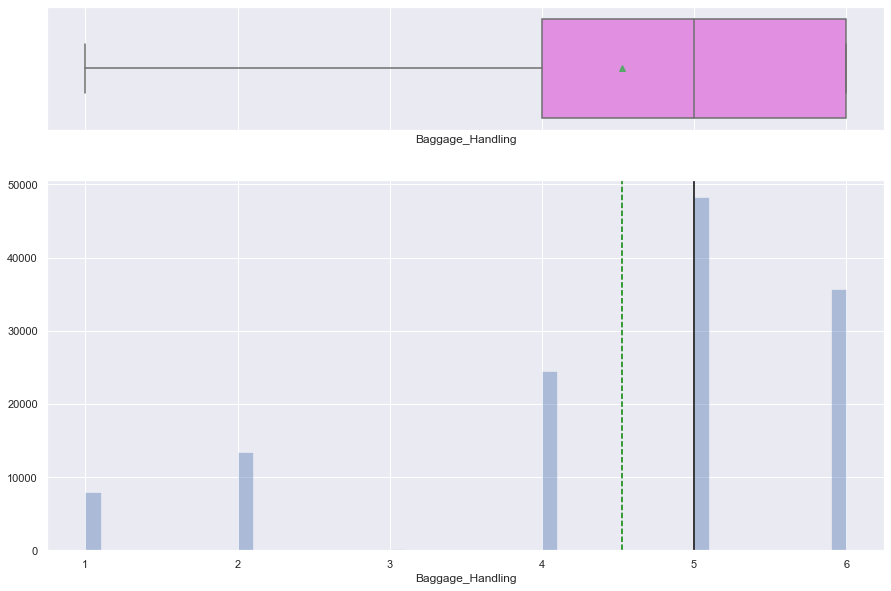

CheckIn_Service
Skew : -0.7


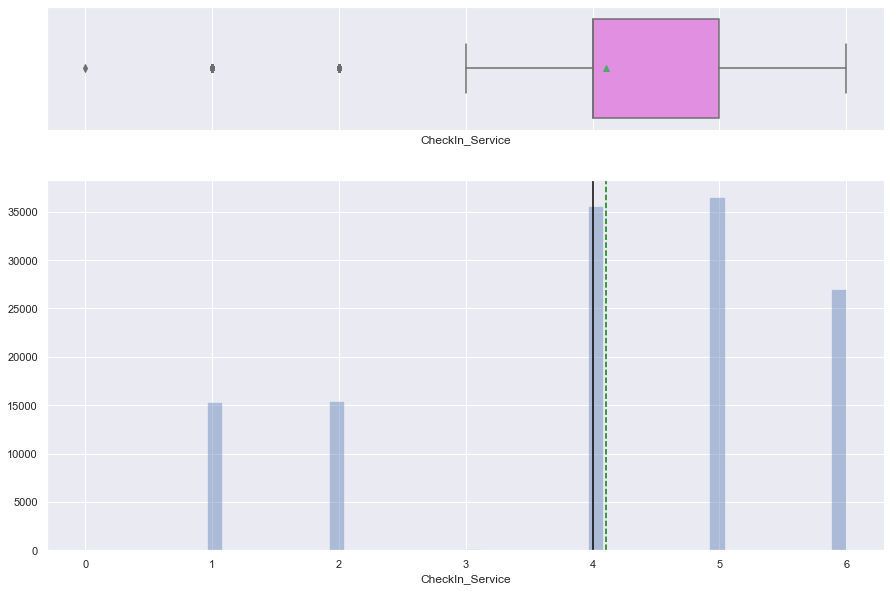

Cleanliness
Skew : -1.12


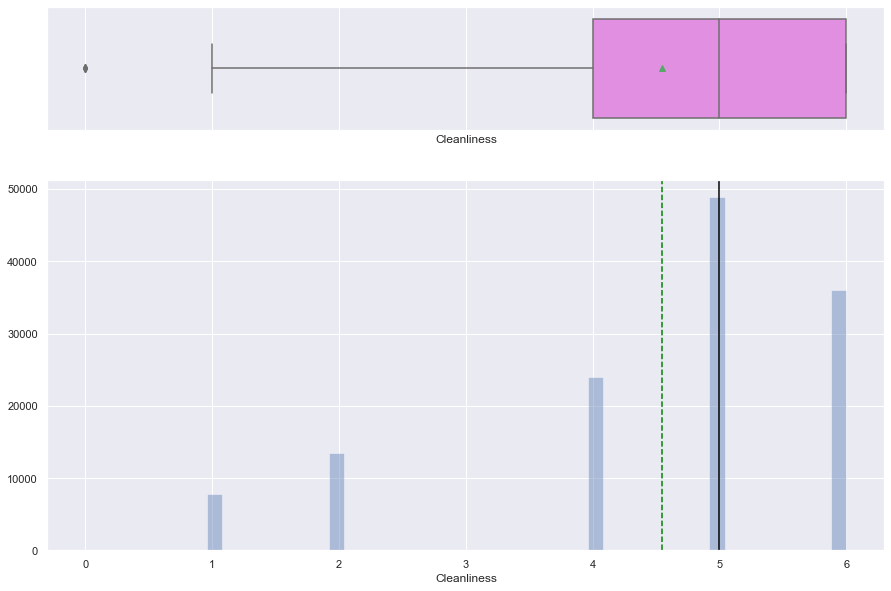

Online_Boarding
Skew : -0.63


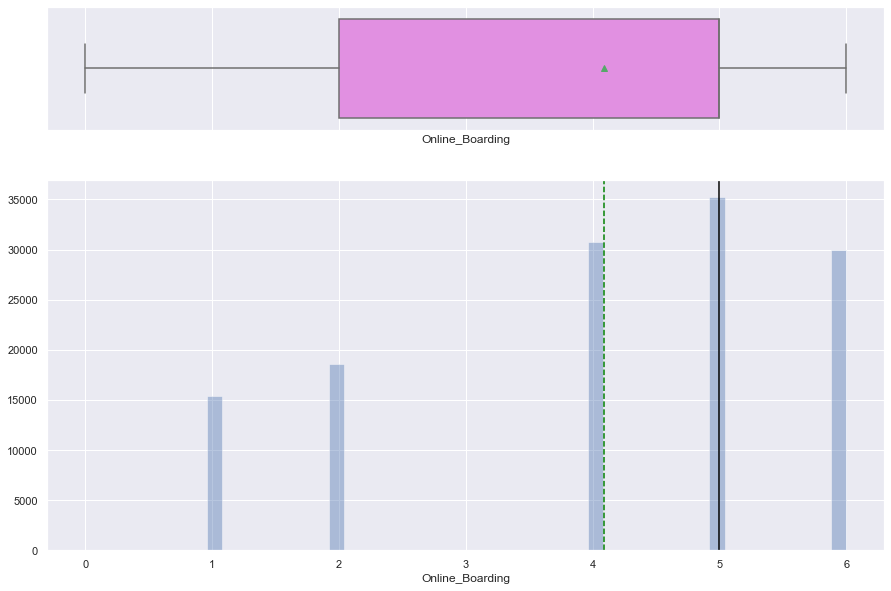

In [716]:
for col in cols_not_cat.columns:
    histogram_boxplot(cols_not_cat[col])

# Bivariate Analysis

In [717]:
independent_variables = df.loc[:,df.columns != 'Overall_Experience']

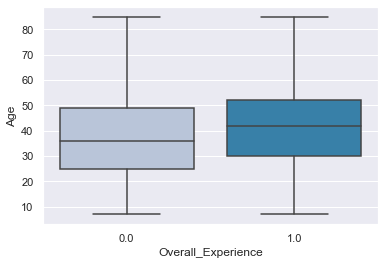

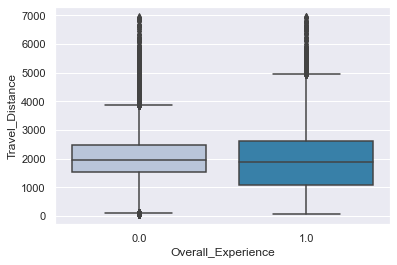

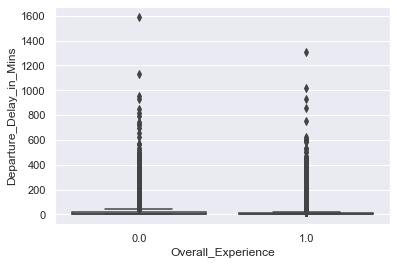

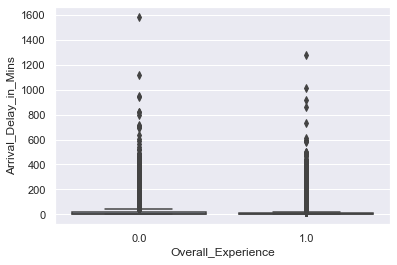

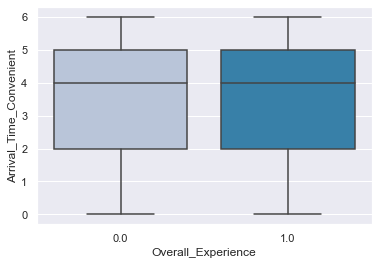

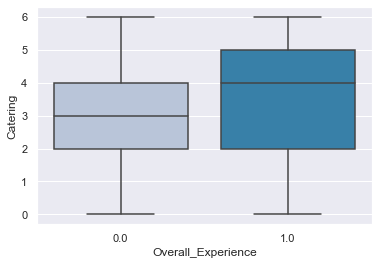

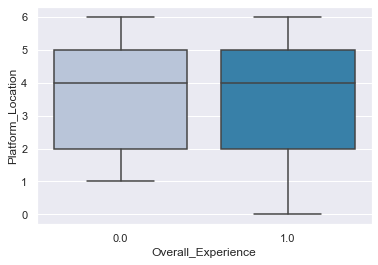

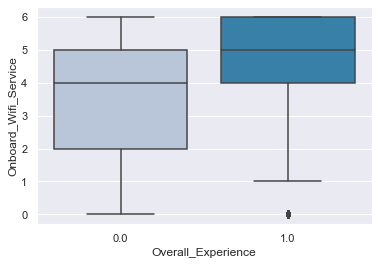

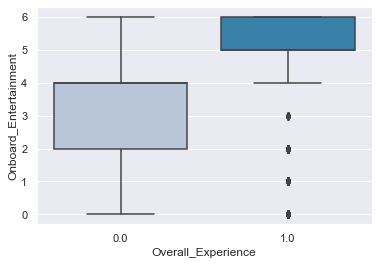

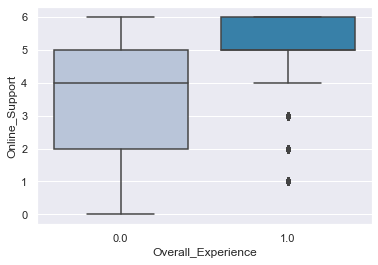

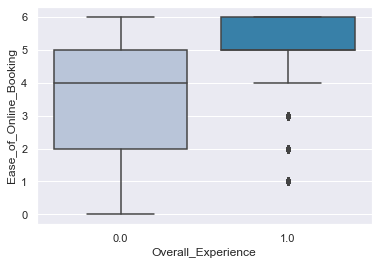

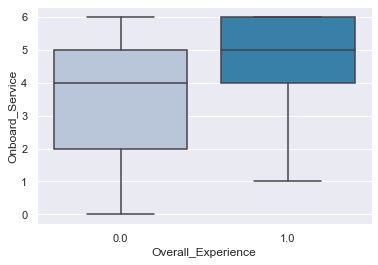

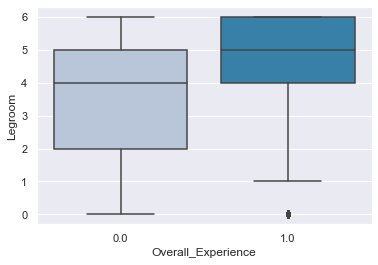

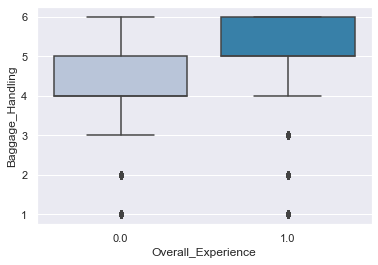

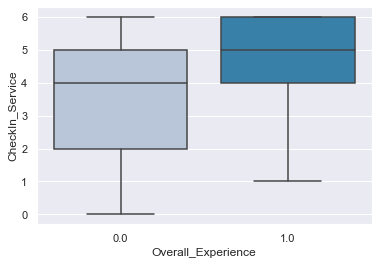

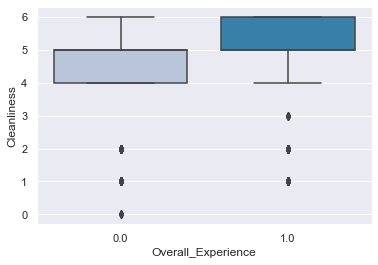

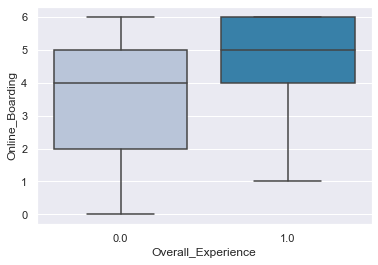

In [718]:
for col in cols_not_cat.columns:
    sns.boxplot(df["Overall_Experience"],cols_not_cat[col],palette="PuBu")
    plt.show()

In [719]:
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,df['Overall_Experience'],margins=True)
    tab2 = pd.crosstab(x,df['Overall_Experience'],margins=True,normalize='index')
    print(tab1)
    print(tab2)    
    print('-'*120)
    tab = pd.crosstab(x,df['Overall_Experience'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

Overall_Experience    0.0    1.0    All
Gender                                 
Female              16636  31179  47815
Male                26111  20376  46487
Unknown                39     38     77
All                 42786  51593  94379
Overall_Experience       0.0       1.0
Gender                                
Female              0.347924  0.652076
Male                0.561684  0.438316
Unknown             0.506494  0.493506
All                 0.453342  0.546658
------------------------------------------------------------------------------------------------------------------------


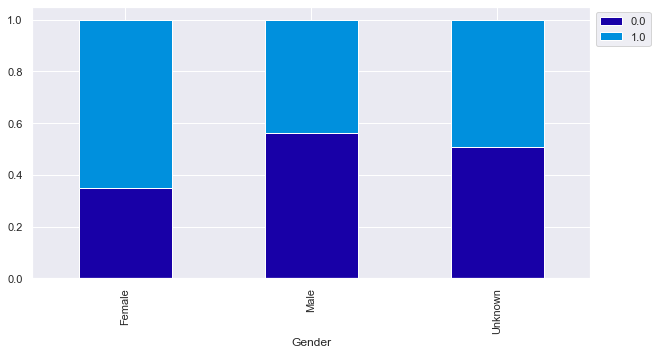

Overall_Experience    0.0    1.0    All
Customer_Type                          
Disloyal Customer   11869   3736  15605
Loyal Customer      26794  43029  69823
Unknown              4123   4828   8951
All                 42786  51593  94379
Overall_Experience       0.0       1.0
Customer_Type                         
Disloyal Customer   0.760590  0.239410
Loyal Customer      0.383742  0.616258
Unknown             0.460619  0.539381
All                 0.453342  0.546658
------------------------------------------------------------------------------------------------------------------------


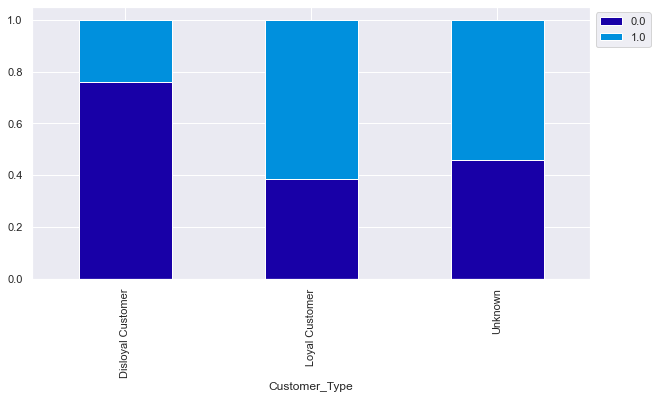

Overall_Experience    0.0    1.0    All
Age                                    
7.0                   280    225    505
8.0                   343    229    572
9.0                   381    259    640
10.0                  359    249    608
11.0                  343    268    611
...                   ...    ...    ...
78.0                   20     10     30
79.0                   32      7     39
80.0                   67     21     88
85.0                   12      6     18
All                 42786  51593  94379

[77 rows x 3 columns]
Overall_Experience       0.0       1.0
Age                                   
7.0                 0.554455  0.445545
8.0                 0.599650  0.400350
9.0                 0.595313  0.404687
10.0                0.590461  0.409539
11.0                0.561375  0.438625
...                      ...       ...
78.0                0.666667  0.333333
79.0                0.820513  0.179487
80.0                0.761364  0.238636
85.0                0.666667

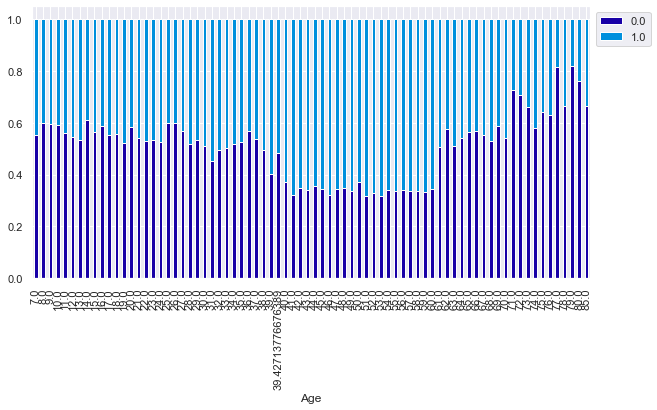

Overall_Experience    0.0    1.0    All
Type_Travel                            
Business Travel     24441  34176  58617
Personal Travel     14159  12377  26536
Unknown              4186   5040   9226
All                 42786  51593  94379
Overall_Experience       0.0       1.0
Type_Travel                           
Business Travel     0.416961  0.583039
Personal Travel     0.533577  0.466423
Unknown             0.453718  0.546282
All                 0.453342  0.546658
------------------------------------------------------------------------------------------------------------------------


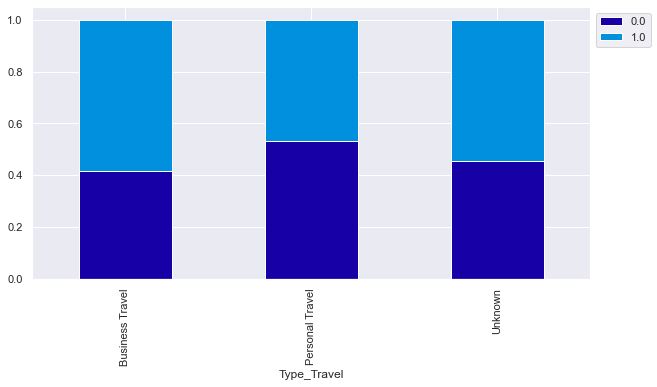

Overall_Experience    0.0    1.0    All
Travel_Class                           
Business            13142  31895  45037
Eco                 29644  19698  49342
All                 42786  51593  94379
Overall_Experience       0.0       1.0
Travel_Class                          
Business            0.291805  0.708195
Eco                 0.600786  0.399214
All                 0.453342  0.546658
------------------------------------------------------------------------------------------------------------------------


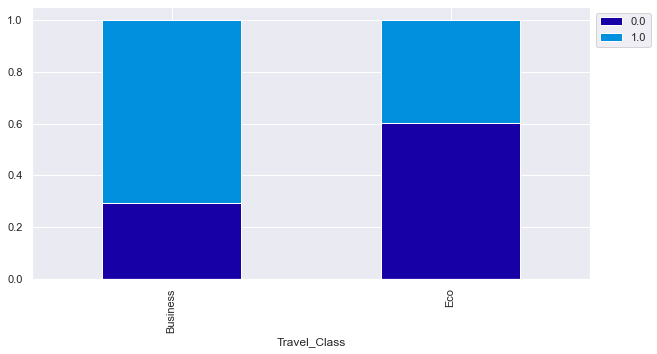

Overall_Experience    0.0    1.0    All
Travel_Distance                        
50                      2     11     13
51                      4     10     14
52                      2     16     18
53                      6     15     21
54                      4      9     13
...                   ...    ...    ...
6924                    1      0      1
6948                    0      1      1
6950                    0      1      1
6951                    1      0      1
All                 42786  51593  94379

[5211 rows x 3 columns]
Overall_Experience       0.0       1.0
Travel_Distance                       
50                  0.153846  0.846154
51                  0.285714  0.714286
52                  0.111111  0.888889
53                  0.285714  0.714286
54                  0.307692  0.692308
...                      ...       ...
6924                1.000000  0.000000
6948                0.000000  1.000000
6950                0.000000  1.000000
6951                1.0000

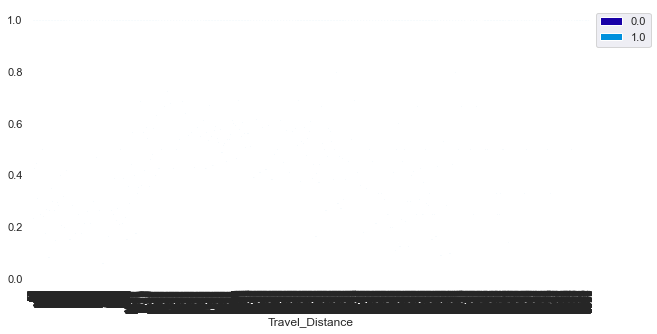

Overall_Experience         0.0    1.0    All
Departure_Delay_in_Mins                     
0.0                      22880  30516  53396
1.0                       1181   1553   2734
2.0                        881   1215   2096
3.0                        828   1010   1838
4.0                        752    889   1641
...                        ...    ...    ...
1017.0                       0      1      1
1128.0                       1      0      1
1305.0                       0      1      1
1592.0                       1      0      1
All                      42786  51593  94379

[438 rows x 3 columns]
Overall_Experience            0.0       1.0
Departure_Delay_in_Mins                    
0.0                      0.428497  0.571503
1.0                      0.431968  0.568032
2.0                      0.420324  0.579676
3.0                      0.450490  0.549510
4.0                      0.458257  0.541743
...                           ...       ...
1017.0                   0.000000  1.00

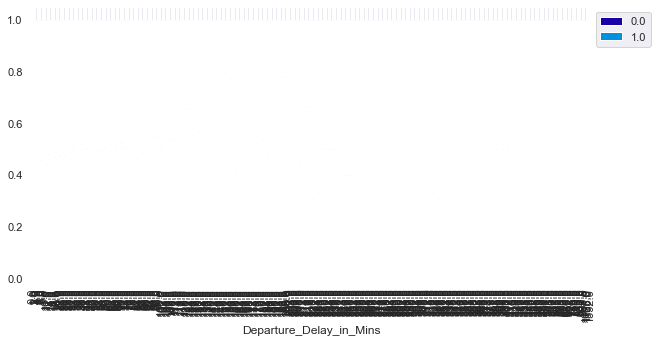

Overall_Experience       0.0    1.0    All
Arrival_Delay_in_Mins                     
0.0                    22069  31203  53272
1.0                      802   1193   1995
2.0                      798   1101   1899
3.0                      686   1071   1757
4.0                      725    988   1713
...                      ...    ...    ...
1011.0                     0      1      1
1115.0                     1      0      1
1280.0                     0      1      1
1584.0                     1      0      1
All                    42786  51593  94379

[435 rows x 3 columns]
Overall_Experience          0.0       1.0
Arrival_Delay_in_Mins                    
0.0                    0.414270  0.585730
1.0                    0.402005  0.597995
2.0                    0.420221  0.579779
3.0                    0.390438  0.609562
4.0                    0.423234  0.576766
...                         ...       ...
1011.0                 0.000000  1.000000
1115.0                 1.000000  0.0000

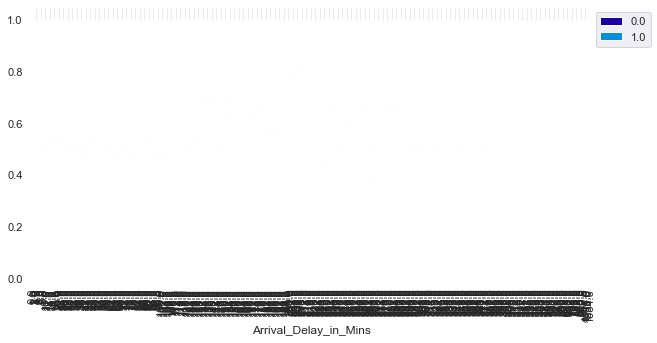

Overall_Experience    0.0    1.0    All
Seat_Comfort                           
Acceptable          13669   7489  21158
Excellent              96  12875  12971
Extremely Poor          8   3455   3463
Good                 7181  13414  20595
Needs Improvement   13464   7482  20946
Poor                 8339   6846  15185
All                 42757  51561  94318
Overall_Experience       0.0       1.0
Seat_Comfort                          
Acceptable          0.646044  0.353956
Excellent           0.007401  0.992599
Extremely Poor      0.002310  0.997690
Good                0.348677  0.651323
Needs Improvement   0.642796  0.357204
Poor                0.549160  0.450840
All                 0.453328  0.546672
------------------------------------------------------------------------------------------------------------------------


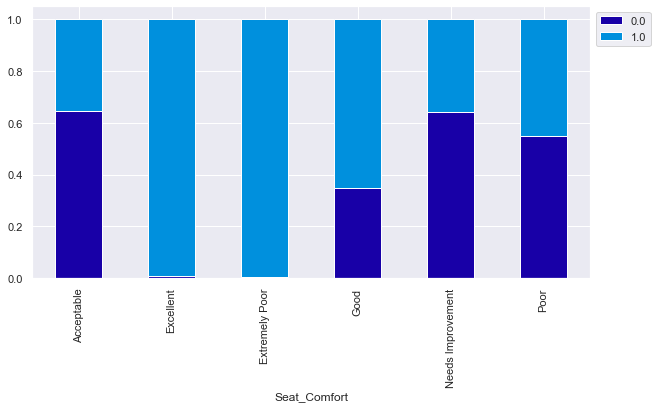

Overall_Experience    0.0    1.0    All
Seat_Class                             
Green Car           21434  26001  47435
Ordinary            21352  25592  46944
All                 42786  51593  94379
Overall_Experience       0.0       1.0
Seat_Class                            
Green Car           0.451860  0.548140
Ordinary            0.454840  0.545160
All                 0.453342  0.546658
------------------------------------------------------------------------------------------------------------------------


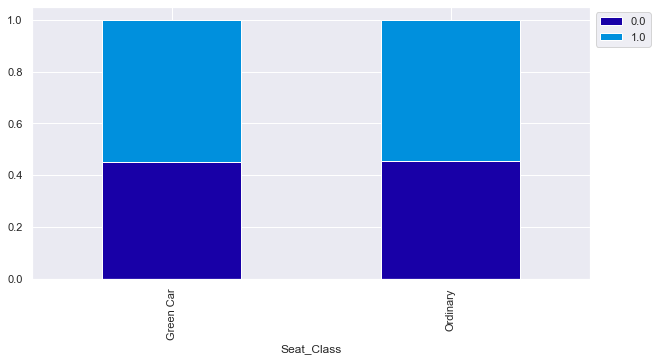

Overall_Experience         0.0    1.0    All
Arrival_Time_Convenient                     
0                         1981   2351   4332
1                         5638   8054  13692
2                         6952   8038  14990
3                         3992   4938   8930
4                         7050   8127  15177
5                         9307  10267  19574
6                         7866   9818  17684
All                      42786  51593  94379
Overall_Experience            0.0       1.0
Arrival_Time_Convenient                    
0                        0.457295  0.542705
1                        0.411773  0.588227
2                        0.463776  0.536224
3                        0.447032  0.552968
4                        0.464519  0.535481
5                        0.475478  0.524522
6                        0.444809  0.555191
All                      0.453342  0.546658
--------------------------------------------------------------------------------------------------------------

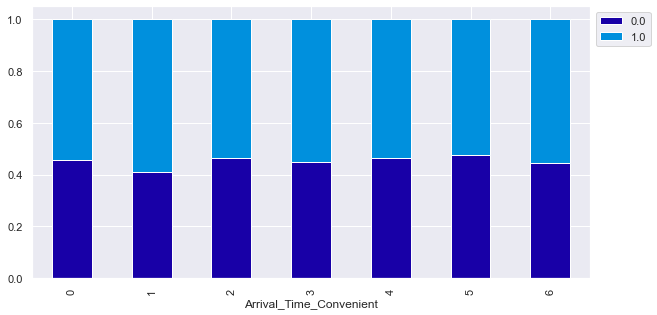

Overall_Experience    0.0    1.0    All
Catering                               
0                     879   3031   3910
1                    6814   7044  13858
2                   10226   7752  17978
3                    3947   4794   8741
4                   10574   7894  18468
5                    7401  10568  17969
6                    2945  10510  13455
All                 42786  51593  94379
Overall_Experience       0.0       1.0
Catering                              
0                   0.224808  0.775192
1                   0.491702  0.508298
2                   0.568806  0.431194
3                   0.451550  0.548450
4                   0.572558  0.427442
5                   0.411876  0.588124
6                   0.218878  0.781122
All                 0.453342  0.546658
------------------------------------------------------------------------------------------------------------------------


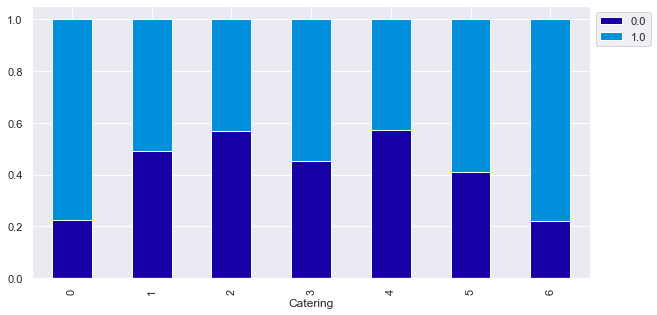

Overall_Experience    0.0    1.0    All
Platform_Location                      
0                       0      2      2
1                    6422  10027  16449
2                    7504  10328  17832
3                      13     17     30
4                   12985  11188  24173
5                   11009  10903  21912
6                    4853   9128  13981
All                 42786  51593  94379
Overall_Experience       0.0       1.0
Platform_Location                     
0                   0.000000  1.000000
1                   0.390419  0.609581
2                   0.420817  0.579183
3                   0.433333  0.566667
4                   0.537170  0.462830
5                   0.502419  0.497581
6                   0.347114  0.652886
All                 0.453342  0.546658
------------------------------------------------------------------------------------------------------------------------


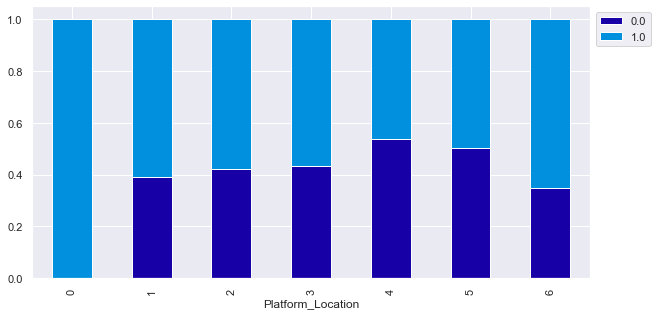

Overall_Experience      0.0    1.0    All
Onboard_Wifi_Service                     
0                        56     35     91
1                      7908   2833  10741
2                      9767   9829  19596
3                        13     17     30
4                      9857  10261  20118
5                      8235  14600  22835
6                      6950  14018  20968
All                   42786  51593  94379
Overall_Experience         0.0       1.0
Onboard_Wifi_Service                    
0                     0.615385  0.384615
1                     0.736244  0.263756
2                     0.498418  0.501582
3                     0.433333  0.566667
4                     0.489959  0.510041
5                     0.360631  0.639369
6                     0.331457  0.668543
All                   0.453342  0.546658
------------------------------------------------------------------------------------------------------------------------


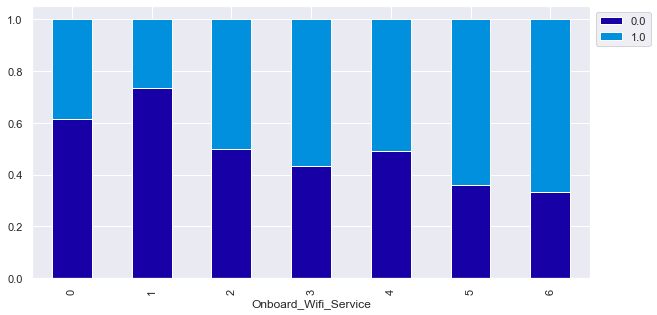

Overall_Experience       0.0    1.0    All
Onboard_Entertainment                     
0                        739   1405   2144
1                       6805   1836   8641
2                      11589   2337  13926
3                          8     10     18
4                      14075   3485  17560
5                       8548  21898  30446
6                       1022  20622  21644
All                    42786  51593  94379
Overall_Experience          0.0       1.0
Onboard_Entertainment                    
0                      0.344683  0.655317
1                      0.787525  0.212475
2                      0.832184  0.167816
3                      0.444444  0.555556
4                      0.801538  0.198462
5                      0.280759  0.719241
6                      0.047219  0.952781
All                    0.453342  0.546658
------------------------------------------------------------------------------------------------------------------------


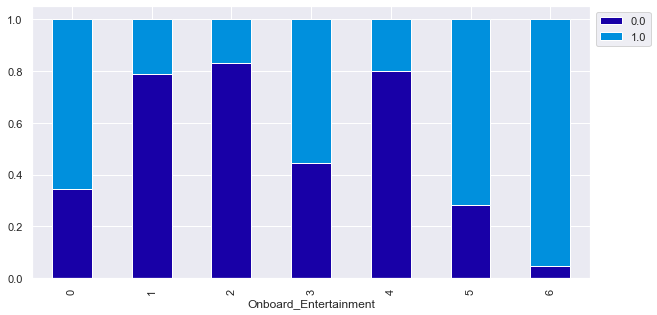

Overall_Experience    0.0    1.0    All
Online_Support                         
0                       1      0      1
1                    7205   2962  10167
2                    8790   3718  12508
3                      31     60     91
4                   11300   4402  15702
5                    9582  20434  30016
6                    5877  20017  25894
All                 42786  51593  94379
Overall_Experience       0.0       1.0
Online_Support                        
0                   1.000000  0.000000
1                   0.708665  0.291335
2                   0.702750  0.297250
3                   0.340659  0.659341
4                   0.719654  0.280346
5                   0.319230  0.680770
6                   0.226964  0.773036
All                 0.453342  0.546658
------------------------------------------------------------------------------------------------------------------------


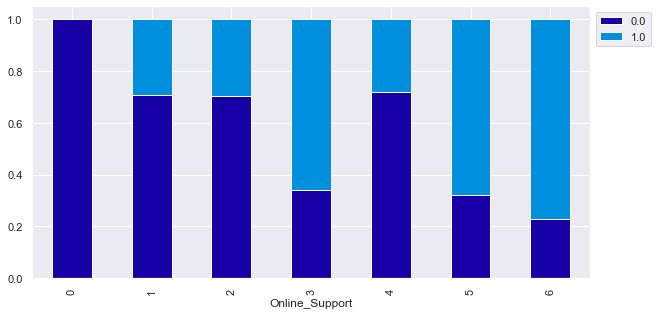

Overall_Experience        0.0    1.0    All
Ease_of_Online_Booking                     
0                          16      0     16
1                        7890   1878   9768
2                       10347   4132  14479
3                          23     50     73
4                       10559   5831  16390
5                        8115  20794  28909
6                        5836  18908  24744
All                     42786  51593  94379
Overall_Experience           0.0       1.0
Ease_of_Online_Booking                    
0                       1.000000  0.000000
1                       0.807740  0.192260
2                       0.714621  0.285379
3                       0.315068  0.684932
4                       0.644234  0.355766
5                       0.280708  0.719292
6                       0.235855  0.764145
All                     0.453342  0.546658
------------------------------------------------------------------------------------------------------------------------


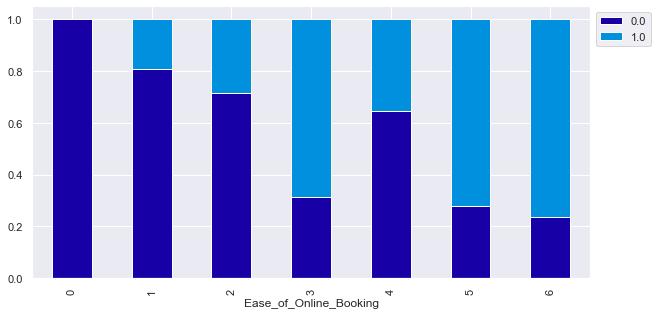

Overall_Experience    0.0    1.0    All
Onboard_Service                        
0                       4      0      4
1                    6425   2351   8776
2                    7547   3843  11390
3                    3445   4156   7601
4                   10708   7363  18071
5                    9625  17640  27265
6                    5032  16240  21272
All                 42786  51593  94379
Overall_Experience       0.0       1.0
Onboard_Service                       
0                   1.000000  0.000000
1                   0.732110  0.267890
2                   0.662599  0.337401
3                   0.453230  0.546770
4                   0.592552  0.407448
5                   0.353017  0.646983
6                   0.236555  0.763445
All                 0.453342  0.546658
------------------------------------------------------------------------------------------------------------------------


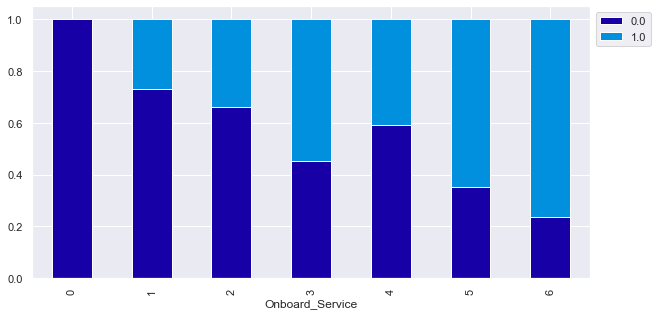

Overall_Experience    0.0    1.0    All
Legroom                                
0                     106    234    340
1                    5776   2334   8110
2                    9814   5939  15753
3                      36     54     90
4                   10321   6063  16384
5                    9488  19382  28870
6                    7245  17587  24832
All                 42786  51593  94379
Overall_Experience       0.0       1.0
Legroom                               
0                   0.311765  0.688235
1                   0.712207  0.287793
2                   0.622992  0.377008
3                   0.400000  0.600000
4                   0.629944  0.370056
5                   0.328646  0.671354
6                   0.291761  0.708239
All                 0.453342  0.546658
------------------------------------------------------------------------------------------------------------------------


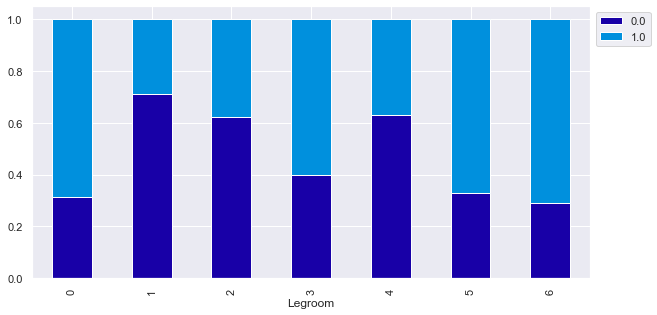

Overall_Experience    0.0    1.0    All
Baggage_Handling                       
1                    3311   2453   5764
2                    5875   3884   9759
3                      64     78    142
4                   12205   5562  17767
5                   14382  20562  34944
6                    6949  19054  26003
All                 42786  51593  94379
Overall_Experience       0.0       1.0
Baggage_Handling                      
1                   0.574427  0.425573
2                   0.602008  0.397992
3                   0.450704  0.549296
4                   0.686948  0.313052
5                   0.411573  0.588427
6                   0.267238  0.732762
All                 0.453342  0.546658
------------------------------------------------------------------------------------------------------------------------


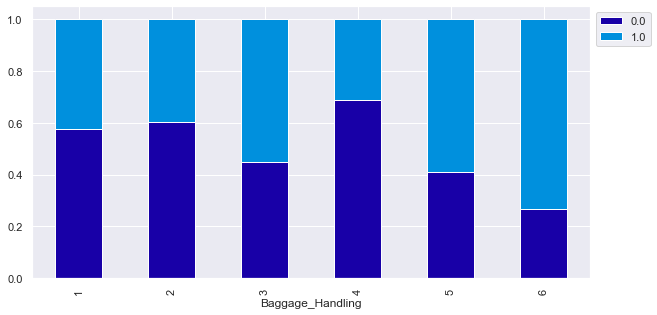

Overall_Experience    0.0    1.0    All
CheckIn_Service                        
0                       1      0      1
1                    7574   3563  11137
2                    7484   3734  11218
3                      34     43     77
4                   11194  14609  25803
5                   11263  15239  26502
6                    5236  14405  19641
All                 42786  51593  94379
Overall_Experience       0.0       1.0
CheckIn_Service                       
0                   1.000000  0.000000
1                   0.680075  0.319925
2                   0.667142  0.332858
3                   0.441558  0.558442
4                   0.433826  0.566174
5                   0.424987  0.575013
6                   0.266585  0.733415
All                 0.453342  0.546658
------------------------------------------------------------------------------------------------------------------------


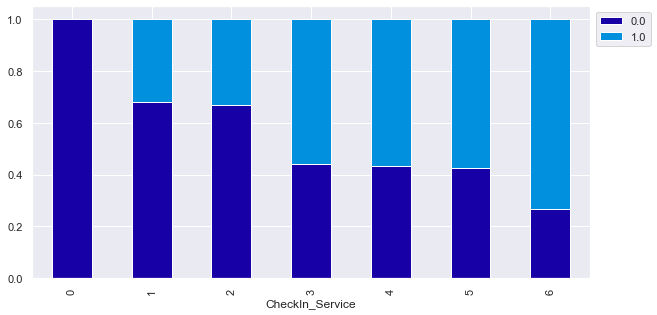

Overall_Experience    0.0    1.0    All
Cleanliness                            
0                       5      0      5
1                    3328   2305   5633
2                    5849   3957   9806
3                       0      6      6
4                   11859   5590  17449
5                   14678  20749  35427
6                    7067  18986  26053
All                 42786  51593  94379
Overall_Experience       0.0       1.0
Cleanliness                           
0                   1.000000  0.000000
1                   0.590804  0.409196
2                   0.596472  0.403528
3                   0.000000  1.000000
4                   0.679638  0.320362
5                   0.414317  0.585683
6                   0.271255  0.728745
All                 0.453342  0.546658
------------------------------------------------------------------------------------------------------------------------


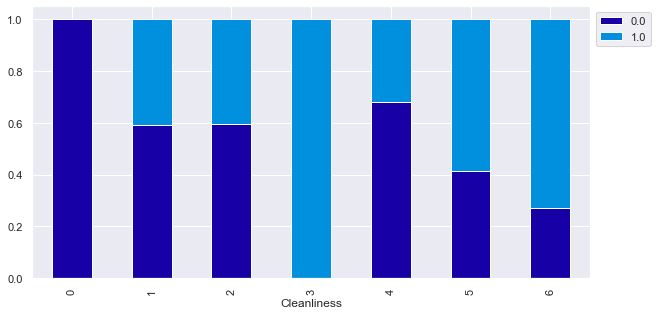

Overall_Experience    0.0    1.0    All
Online_Boarding                        
0                      12      0     12
1                    8249   2911  11160
2                    9674   3777  13451
3                       0      6      6
4                   10125  12350  22475
5                    8869  16664  25533
6                    5857  15885  21742
All                 42786  51593  94379
Overall_Experience       0.0       1.0
Online_Boarding                       
0                   1.000000  0.000000
1                   0.739158  0.260842
2                   0.719203  0.280797
3                   0.000000  1.000000
4                   0.450501  0.549499
5                   0.347354  0.652646
6                   0.269386  0.730614
All                 0.453342  0.546658
------------------------------------------------------------------------------------------------------------------------


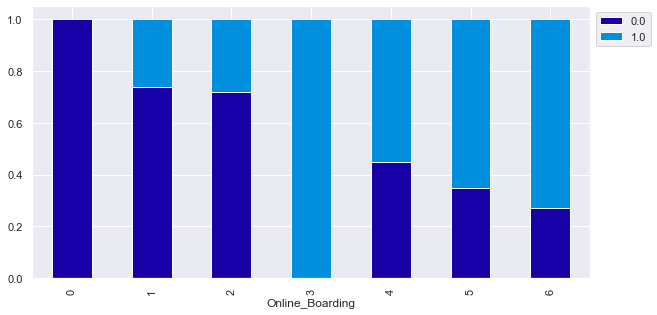

In [720]:
for col in independent_variables.columns:
    stacked_plot(independent_variables[col])
    plt.show()

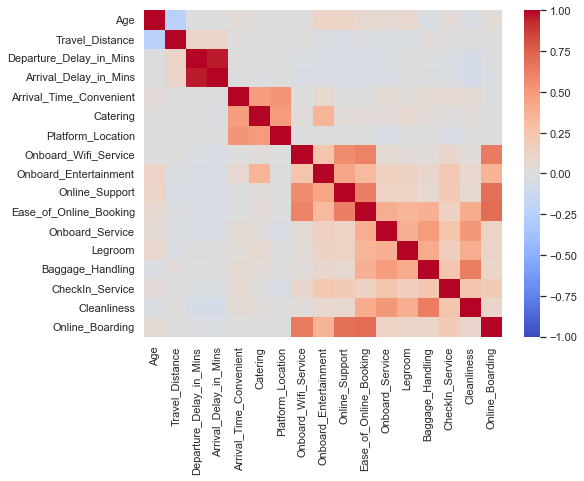

In [721]:
# Separating numerical variables
numerical_col = df.select_dtypes(include=np.number).columns.tolist()

# Building correlation matrix for numerical columns
corr = df[numerical_col].corr()

# ploting the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr,cmap='coolwarm',vmax=1,vmin=-1,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns);

In [ ]:
sns.pairplot(df, hue='Overall_Experience')

# Treatment of Outliers

In [ ]:
def treat_outliers(df,col):
    '''
    treats outliers in a variable
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1   # IQR Range
    Lower_Whisker = Q1-IQR*1.5  #define lower whisker
    Upper_Whisker = Q3+IQR*1.5  # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                             # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df